In [7]:
from fastai.vision.all import *

In [2]:
DATASET_PATH = 'dataset'

/home/savva/Programming/Dataset-creator/venv/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


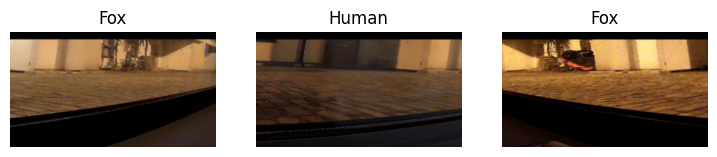

In [3]:
# Creating dataloader
dtBlock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                    get_items=get_image_files, 
                    splitter=RandomSplitter(seed=123),
                    get_y=parent_label,
                    item_tfms=Resize(324, 576),
                    batch_tfms=aug_transforms(size=(324, 576), max_zoom=1, max_warp=0, max_rotate=0))
dls = dtBlock.dataloaders(DATASET_PATH)
dls.show_batch(nrows=1, ncols=3)

In [4]:
learn = vision_learner(dls, arch=resnet34, metrics=error_rate)
learn.fine_tune(2)

/home/savva/Programming/Dataset-creator/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/savva/Programming/Dataset-creator/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.639048,0.913385,0.328938,17:06


epoch,train_loss,valid_loss,error_rate,time
0,1.028527,0.626581,0.243223,26:41
1,0.768238,0.546279,0.211722,24:51


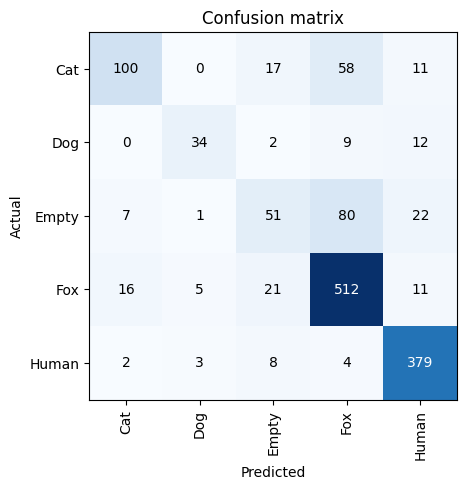

In [5]:
interpretation = ClassificationInterpretation.from_learner(learn)
interpretation.plot_confusion_matrix()

In [11]:
learn.export()